### Scenario 3
#### Construction year 'Wind park 1' = Construction year 'Wind park 2' = Construction year 'Artificial Energy Island'
This notebook shows the basics of Scenario 3 as suggested by Wouter van den Haak:
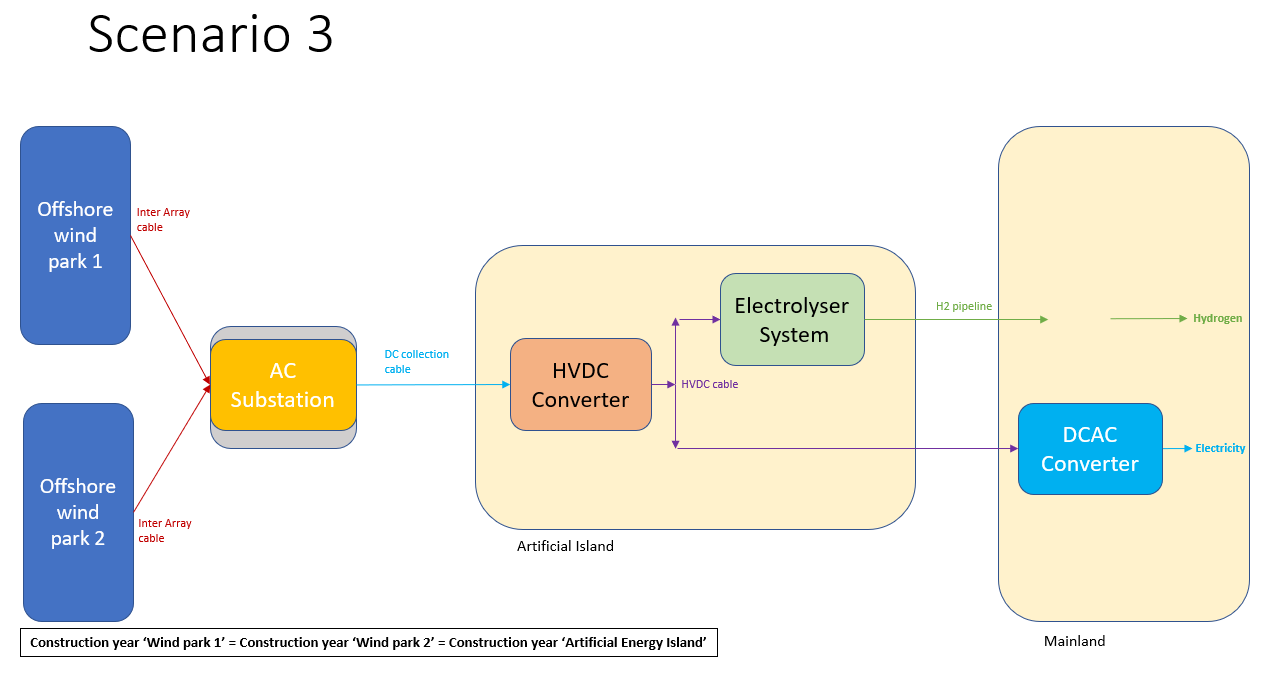

#### 0. Import basic methods (a.o. from source2.py)

In [1]:
from source2 import *
import numpy as np
BOLD = "\033[1m"

In [2]:
# load basic info from the Input sheet
mapping = load_input_from_xls(filename=r'Case 1 - Input Sheet.xlsm')
Inputs = extract_scenario(mapping, 'Scenario1')

##### 1. prepare input data and generate objects
#### 1.1 General input

In [3]:
#General
WACC = 0.0984

#Time input
startyear = 2030
endyear = startyear + 29

#Escalation
escalation_base_year = 2030 
lifecycle=30               
escalation_rate=0.02    

#Distances
distance_windpark = 180_000 #meter (distance windpark from shore)
distance_island_shore = 150_000 #meter
distance_DC_collection = distance_windpark - distance_island_shore #meter

#Windpark
capacity_windpark1 = 12000 #MW
capacity_windpark2 = 0 #MW

#Dedicated energy for electrolysis / electricity
dedicated_electrolyser_energy = 0.3
dedicated_DCAC_energy = (1 - dedicated_electrolyser_energy)

#Efficiency factors
inter_array_cable_efficiency = 0.99 
DC_collection_cable_efficiency = 0.95
HVDC_cable_efficiency = 1 - (0.01 * (0.00005 *(distance_island_shore) + 4))
H2_pipeline_efficiency = 0.95
DCAC_efficiency = 0.9

#Electricity to hydrogen conversion
kWh_to_kg = 50 #kWh/kg hydrogen

#Energy prices
electricity_price = 0.18  # 0.18 EU/kWh
hydrogen_price = 6 # 6 EU / kg 

#### 1.2 Element data
We are including the following elements:

##### 1.2.1 Foundations and cables

In [4]:
#Wind park 1
foundation_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Foundation & cable')
foundation_data['depreciation_rate']=1/foundation_data['economic_lifetime']
foundation_data['unit'] = capacity_windpark1
display(foundation_data)

#Wind park 2
foundation2_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Foundation & cable')
foundation2_data['depreciation_rate']=1/foundation2_data['economic_lifetime']
foundation2_data['unit'] = capacity_windpark2
display(foundation2_data)

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Foundation & cable',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 971621.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 12000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.015,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.35,
 'residual_value': 0.01}

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Foundation & cable',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 971621.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.015,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.35,
 'residual_value': 0.01}

In [5]:
#Wind park 1
Foundation = Object(**foundation_data)

#Wind park 2
Foundation2 = Object(**foundation2_data)

In [6]:
#Wind park 1
Foundation.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

#Wind park 2
Foundation2.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.2.2 Turbines

In [7]:
#Wind park 1
turbine_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Turbine')
turbine_data['depreciation_rate']=1/turbine_data['economic_lifetime']
turbine_data['unit']=capacity_windpark1
display(turbine_data)

#Wind park 2
turbine2_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Turbine')
turbine2_data['depreciation_rate']=1/turbine2_data['economic_lifetime']
turbine2_data['unit']=capacity_windpark2
display(turbine2_data)

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Turbine',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 1139979.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 12000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.08,
 'residual_value': 0.01}

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Turbine',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 1139979.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.08,
 'residual_value': 0.01}

In [8]:
#Wind park 1
Turbine = Object(**turbine_data)

#Wind park 2
Turbine2 = Object(**turbine2_data)

In [9]:
#Wind park 1
Turbine.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

#Wind park 2
Turbine2.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.3.1 AC Substation

In [10]:
#AC Substation 1
AC_substation_data = get_object_data(Inputs=Inputs, 
                               subsystem='AC Substation & Transport', 
                               element='AC Substation & Transport',
                               component='AC Substation')
AC_substation_data['depreciation_rate']=1/AC_substation_data['economic_lifetime']
AC_substation_data['unit'] = turbine_data['unit'] + turbine2_data['unit']
display(AC_substation_data)

{'sub_system': 'AC Substation & Transport',
 'element': 'AC Substation & Transport',
 'component': 'AC Substation',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 185000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 12000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 40,
 'depreciation_flag': 1,
 'depreciation_rate': 0.025,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.2,
 'residual_value': 0.01}

In [11]:
#AC Substation 1
ACStation = Object(**AC_substation_data)

In [12]:
#AC Substation 1
ACStation.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.3.2 DC Collection Cable

In [13]:
#DC Collection Cable 1
DC_collection_cable_data = get_object_data(Inputs=Inputs, 
                               subsystem='AC Substation & Transport', 
                               element='AC Substation & Transport',
                               component='DC collection cable')
DC_collection_cable_data['depreciation_rate']=1/DC_collection_cable_data['economic_lifetime']
DC_collection_cable_data['unit'] = distance_DC_collection
display(DC_collection_cable_data)

{'sub_system': 'AC Substation & Transport',
 'element': 'AC Substation & Transport',
 'component': 'DC collection cable',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 2000.0,
 'capex_per_unit_units': 'EUR / m',
 'unit': 30000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 40,
 'depreciation_flag': 1,
 'depreciation_rate': 0.025,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.2,
 'residual_value': 0.01}

In [14]:
#DC Collection Cable 1
DCCollectionCable = Object(**DC_collection_cable_data)

In [15]:
#DC Collection Cable 1
DCCollectionCable.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.4.1 HVDC Converter

In [16]:
#HVDC Converter 1
HVDC_converter_data = get_object_data(Inputs=Inputs, 
                               subsystem='Converter & Transport', 
                               element='Converter',
                               component='HVDC Converter')
HVDC_converter_data['depreciation_rate']=1/HVDC_converter_data['economic_lifetime']
HVDC_converter_data['unit'] = turbine_data['unit'] + turbine2_data['unit']
display(HVDC_converter_data)

{'sub_system': 'Converter & Transport',
 'element': 'Converter',
 'component': 'HVDC Converter',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 472500.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 12000,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [17]:
#HVDC Converter 1
HVDCConverter = Object(**HVDC_converter_data)

In [18]:
#HVDC Converter 1
HVDCConverter.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.4.2 HVDC Cable

In [19]:
#HVDC Cable 1 (for electrolysis)
HVDC_cable_data = get_object_data(Inputs=Inputs, 
                               subsystem='Converter & Transport', 
                               element='Converter',
                               component='HVDC Cable')
HVDC_cable_data['depreciation_rate']=1/HVDC_cable_data['economic_lifetime']
HVDC_cable_data['unit'] = distance_island_shore * dedicated_DCAC_energy
HVDC_cable_data['capex_per_unit'] = 3800 
display(HVDC_cable_data)

#HVDC Cable 2 (for DCAC)
HVDC_cable2_data = get_object_data(Inputs=Inputs, 
                               subsystem='Converter & Transport', 
                               element='Converter',
                               component='HVDC Cable')
HVDC_cable2_data['depreciation_rate']=1/HVDC_cable2_data['economic_lifetime']
HVDC_cable2_data['unit'] = distance_island_shore * dedicated_DCAC_energy
HVDC_cable2_data['capex_per_unit'] = 3800 
display(HVDC_cable2_data)

{'sub_system': 'Converter & Transport',
 'element': 'Converter',
 'component': 'HVDC Cable',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 3800,
 'capex_per_unit_units': 'EUR / m',
 'unit': 105000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

{'sub_system': 'Converter & Transport',
 'element': 'Converter',
 'component': 'HVDC Cable',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 3800,
 'capex_per_unit_units': 'EUR / m',
 'unit': 105000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [20]:
#HVDC Cable 1
HVDCCable = Object(**HVDC_cable_data)

#HVDC Cable 2
HVDCCable2 = Object(**HVDC_cable2_data)

In [21]:
#HVDC Cable 1
HVDCCable.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

#HVDC Cable 2
HVDCCable2.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.5.1 Electrolyser

In [22]:
#Electrolyser 1
Electrolyser_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Electrolyser')
Electrolyser_data['depreciation_rate']=1/Electrolyser_data['economic_lifetime']
Electrolyser_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_electrolyser_energy
display(Electrolyser_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Electrolyser',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 535000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3600.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 25,
 'depreciation_flag': 1,
 'depreciation_rate': 0.04,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [23]:
#Electrolyser 1
Electrolyser = Object(**Electrolyser_data)

In [24]:
#Electrolyser 1
Electrolyser.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.5.2 Desalination Unit

In [25]:
#Desalination Unit 1
Desalination_unit_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Desalination unit')
Desalination_unit_data['depreciation_rate']=1/Desalination_unit_data['economic_lifetime']
Desalination_unit_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_electrolyser_energy
display(Desalination_unit_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Desalination unit',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 3900.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3600.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [26]:
#Desalination Unit 1
DesalinationUnit = Object(**Desalination_unit_data)

In [27]:
#Desalination Unit 1
DesalinationUnit.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.5.3 Compressor Unit

In [28]:
#Compressor Unit 1
Compressor_unit_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Compressor unit')
Compressor_unit_data['depreciation_rate']=1/Compressor_unit_data['economic_lifetime']
Compressor_unit_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_electrolyser_energy
display(Compressor_unit_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Compressor unit',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 153000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3600.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [29]:
#Compressor Unit 1
CompressorUnit = Object(**Compressor_unit_data)

In [30]:
#Compressor Unit 1
CompressorUnit.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.5.4 Storage Unit

In [31]:
#Storage Unit 1
Storage_unit_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Storage unit')
Storage_unit_data['depreciation_rate']=1/Storage_unit_data['economic_lifetime']
Storage_unit_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_electrolyser_energy
display(Storage_unit_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Storage unit',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 290000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3600.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [32]:
#Storage Unit 1
StorageUnit = Object(**Storage_unit_data)

In [33]:
#Storage Unit 1
StorageUnit.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.5.5 Compressor after storage

In [34]:
#Compressor after storage 1
Compressor_after_storage_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electrolysis',
                               component='Compressor after storage')
Compressor_after_storage_data['depreciation_rate']=1/Compressor_after_storage_data['economic_lifetime']
Compressor_after_storage_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_electrolyser_energy
display(Compressor_after_storage_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electrolysis',
 'component': 'Compressor after storage',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 10200.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3600.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 15,
 'depreciation_flag': 1,
 'depreciation_rate': 0.06666666666666667,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [35]:
#Compressor after storage 1
CompressorAfterStorage = Object(**Compressor_after_storage_data)

In [36]:
#Compressor after storage 1
CompressorAfterStorage.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.6 DCAC Converter

In [37]:
#DCAC Converter 1
DCAC_converter_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Electricity',
                               component='DCAC Converter')
DCAC_converter_data['depreciation_rate']=1/DCAC_converter_data['economic_lifetime']
DCAC_converter_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_DCAC_energy
display(DCAC_converter_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Electricity',
 'component': 'DCAC Converter',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 285000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 8400.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 25,
 'depreciation_flag': 1,
 'depreciation_rate': 0.04,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.25,
 'residual_value': 0.01}

In [38]:
#DCAC Converter 1
DCACConverter = Object(**DCAC_converter_data)

In [39]:
#DCAC Converter 1
DCACConverter.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.7.1 Artificial Island

In [40]:
Artificial_island_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Facility location',
                               component='Artificial island')
Artificial_island_data['depreciation_rate']=1/Artificial_island_data['economic_lifetime']
Artificial_island_data['unit']=1
Artificial_island_data['capex_per_unit']=1_410_000_000
display(Artificial_island_data)

{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Facility location',
 'component': 'Artificial island',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 1410000000,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 1,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 80,
 'depreciation_flag': 1,
 'depreciation_rate': 0.0125,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': 0.01}

In [41]:
ArtificialIsland = Object(**Artificial_island_data)

In [42]:
ArtificialIsland.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.7.2 Mainland

In [43]:
Mainland_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Facility location',
                               component='Mainland')
Mainland_data['depreciation_rate']=1/Mainland_data['economic_lifetime']
Mainland_data['unit'] = (turbine_data['unit'] + turbine2_data['unit']) * dedicated_DCAC_energy
display(Mainland_data)

issue detected


{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Facility location',
 'component': 'Mainland',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 6000.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 8400.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 80,
 'depreciation_flag': 1,
 'depreciation_rate': 0.0125,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.1,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.01,
 'residual_value': []}

In [44]:
Mainland = Object(**Mainland_data)

In [45]:
Mainland.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 1.8.1 H2 Pipeline

In [46]:
H2_pipeline_data = get_object_data(Inputs=Inputs, 
                               subsystem='Electrolysis, Electricity & Transport', 
                               element='Transport',
                               component='H2 Pipeline')
H2_pipeline_data['depreciation_rate']=1/H2_pipeline_data['economic_lifetime']
H2_pipeline_data['unit'] = distance_island_shore * dedicated_electrolyser_energy
H2_pipeline_data['capex_per_unit'] = 1500
display(H2_pipeline_data)

issue detected


{'sub_system': 'Electrolysis, Electricity & Transport',
 'element': 'Transport',
 'component': 'H2 Pipeline',
 'escalation_base_year': 2030,
 'escalation_rate': 0.02,
 'capex_per_unit': 1500,
 'capex_per_unit_units': 'EUR / m',
 'unit': 45000.0,
 'unit_units': 'm',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.02,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.02,
 'residual_value': []}

In [47]:
H2Pipeline = Object(**H2_pipeline_data)

In [48]:
H2Pipeline.generate_cashflows(startyear=2030, lifecycle=30, debug=False)

##### 2. Generate combined cashflows

In [49]:
# place escalated revenue values in the cashflow dataframe
df_combined=combine_cashflow_dataframes([Foundation.df, Foundation2.df, Turbine.df, Turbine2.df, ACStation.df, DCCollectionCable.df, HVDCConverter.df, HVDCCable.df, HVDCCable2.df, Electrolyser.df, DesalinationUnit.df, CompressorUnit.df, StorageUnit.df, CompressorAfterStorage.df, DCACConverter.df, ArtificialIsland.df, Mainland.df, H2Pipeline.df])

##### 3. Calculate NPVs

In [50]:
df_combined_npv=calculate_npv(df_combined, 2030, WACC=WACC)
display(df_combined_npv)
final_npv_sum = df_combined_npv['npv_sum'].iloc[-1]
print(final_npv_sum)

,years,capex,opex,revenue,cashflow,cashflow_sum,npv,npv_sum
years,,,,,,,,
2030,2030,-8.482455e+09,0.000000e+00,0,-8.482455e+09,-8.482455e+09,-8.482455e+09,-8.482455e+09
2031,2031,-1.730421e+10,0.000000e+00,0,-1.730421e+10,-2.578666e+10,-1.575401e+10,-2.423647e+10
2032,2032,-1.765029e+10,0.000000e+00,0,-1.765029e+10,-4.343695e+10,-1.462955e+10,-3.886601e+10
2033,2033,0.000000e+00,-1.321614e+09,0,-1.321614e+09,-4.475857e+10,-9.972938e+08,-3.986331e+10
2034,2034,0.000000e+00,-1.348046e+09,0,-1.348046e+09,-4.610661e+10,-9.261104e+08,-4.078942e+10
2035,2035,0.000000e+00,-1.375007e+09,0,-1.375007e+09,-4.748162e+10,-8.600078e+08,-4.164942e+10
2036,2036,0.000000e+00,-1.402508e+09,0,-1.402508e+09,-4.888413e+10,-7.986234e+08,-4.244805e+10
2037,2037,0.000000e+00,-1.430558e+09,0,-1.430558e+09,-5.031469e+10,-7.416205e+08,-4.318967e+10
2038,2038,0.000000e+00,-1.459169e+09,0,-1.459169e+09,-5.177386e+10,-6.886861e+08,-4.387835e+10


-52284935736.79744


##### 4. Plots

##### 4.1. NPV Plot

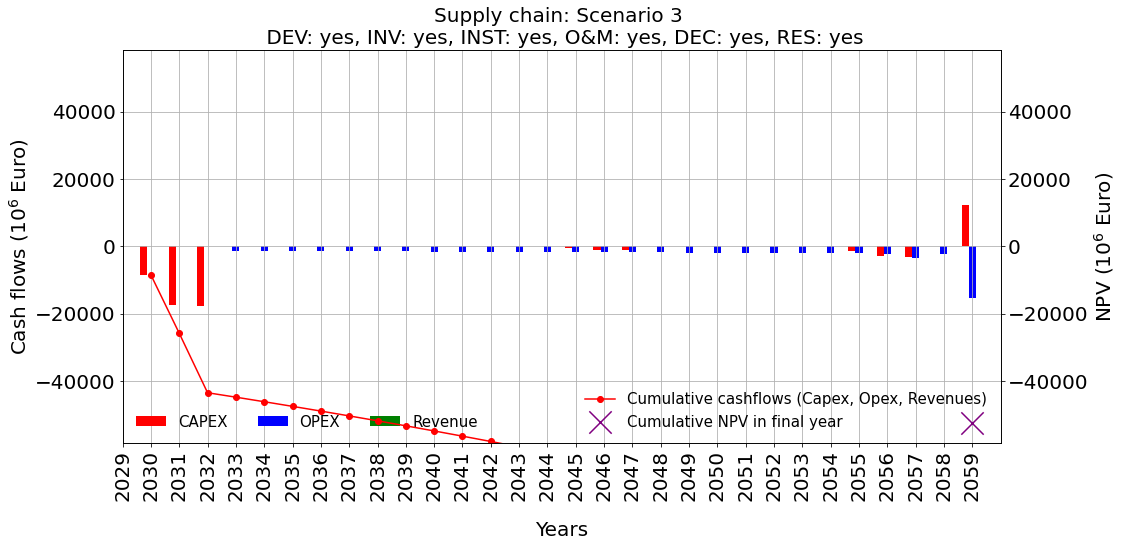

In [51]:
# DEV: Project development costs
# INV: Investment / procurement costs
# INST: Installation / construction costs 
# O&M: Yearly variable / O&M costs 
# DEC: Decommissioning costs 
# RES: Residual value   

create_npv_plot(df_combined_npv, title='Supply chain: Scenario 3 \n DEV: yes, INV: yes, INST: yes, O&M: yes, DEC: yes, RES: yes' )

##### 4.2. Pie chart

In [52]:
# collect the npv calculations per item (without revenues)
Foundation.df_npv = calculate_npv(Foundation.df, 2030, WACC=WACC)
Foundation2.df_npv = calculate_npv(Foundation2.df, 2030, WACC=WACC)

Turbine.df_npv = calculate_npv(Turbine.df, 2030, WACC=WACC)
Turbine2.df_npv = calculate_npv(Turbine2.df, 2030, WACC=WACC)

ACStation.df_npv = calculate_npv(ACStation.df, 2030, WACC=WACC)
DCCollectionCable.df_npv = calculate_npv(DCCollectionCable.df, 2030, WACC=WACC)

HVDCConverter.df_npv = calculate_npv(HVDCConverter.df, 2030, WACC=WACC)
HVDCCable.df_npv = calculate_npv(HVDCCable.df, 2030, WACC=WACC)
HVDCCable2.df_npv = calculate_npv(HVDCCable2.df, 2030, WACC=WACC)

Electrolyser.df_npv = calculate_npv(Electrolyser.df, 2030, WACC=WACC)
DesalinationUnit.df_npv = calculate_npv(DesalinationUnit.df, 2030, WACC=WACC)
CompressorUnit.df_npv = calculate_npv(CompressorUnit.df, 2030, WACC=WACC)
StorageUnit.df_npv = calculate_npv(StorageUnit.df, 2030, WACC=WACC)
CompressorAfterStorage.df_npv = calculate_npv(CompressorAfterStorage.df, 2030, WACC=WACC)

DCACConverter.df_npv = calculate_npv(DCACConverter.df, 2030, WACC=WACC)

ArtificialIsland.df_npv = calculate_npv(ArtificialIsland.df, 2030, WACC=WACC)
Mainland.df_npv = calculate_npv(Mainland.df, 2030, WACC=WACC)

H2Pipeline.df_npv = calculate_npv(H2Pipeline.df, 2030, WACC=WACC)

In [53]:
# combine the values of certain items
foundation_cables_value_npv_sum = -Foundation.df_npv.npv_sum.iloc[-1] - Foundation2.df_npv.npv_sum.iloc[-1]
turbine_value_npv_sum = -Turbine.df_npv.npv_sum.iloc[-1] - Turbine2.df_npv.npv_sum.iloc[-1]
AC_substation_value_npv_sum = -ACStation.df_npv.npv_sum.iloc[-1] - DCCollectionCable.df_npv.npv_sum.iloc[-1]
hvdc_converter_value_npv_sum = -HVDCConverter.df_npv.npv_sum.iloc[-1] 
hvdc_cable_value_npv_sum = - HVDCCable.df_npv.npv_sum.iloc[-1] -HVDCCable2.df_npv.npv_sum.iloc[-1]
electrolysis_value_npv_sum = -Electrolyser.df_npv.npv_sum.iloc[-1] -DesalinationUnit.df_npv.npv_sum.iloc[-1] -CompressorUnit.df_npv.npv_sum.iloc[-1] -StorageUnit.df_npv.npv_sum.iloc[-1] -CompressorAfterStorage.df_npv.npv_sum.iloc[-1]
dcac_converter_value_npv_sum = -DCACConverter.df_npv.npv_sum.iloc[-1]
artificial_island_value_npv_sum = -ArtificialIsland.df_npv.npv_sum.iloc[-1]
mainland_value_npv_sum = -Mainland.df_npv.npv_sum.iloc[-1]
H2_pipeline_value_npv_sum = -H2Pipeline.df_npv.npv_sum.iloc[-1]

# create a new data point for each combined value
data_hydrogen_npv = [foundation_cables_value_npv_sum, turbine_value_npv_sum, AC_substation_value_npv_sum, hvdc_converter_value_npv_sum, electrolysis_value_npv_sum, artificial_island_value_npv_sum, H2_pipeline_value_npv_sum
]

data_electricity_npv = [foundation_cables_value_npv_sum, turbine_value_npv_sum, AC_substation_value_npv_sum, hvdc_converter_value_npv_sum, hvdc_cable_value_npv_sum, dcac_converter_value_npv_sum, artificial_island_value_npv_sum, mainland_value_npv_sum
]

In [54]:
#Cost allocation to hydrogen and electricity
dedicated_data_hydrogen_npv = []
for item in data_hydrogen_npv:
    if item not in [electrolysis_value_npv_sum, H2_pipeline_value_npv_sum]:
        dedicated_data_hydrogen_npv.append(dedicated_electrolyser_energy * item)

data_hydrogen = sum(dedicated_data_hydrogen_npv) + electrolysis_value_npv_sum + H2_pipeline_value_npv_sum

print(data_hydrogen)
print('27275595922.91795')

dedicated_data_electricity_npv = []
for item in data_electricity_npv:
    if item not in [hvdc_cable_value_npv_sum, dcac_converter_value_npv_sum, mainland_value_npv_sum]:
        dedicated_data_electricity_npv.append(dedicated_DCAC_energy * item)

data_electricity = sum(dedicated_data_electricity_npv) + dcac_converter_value_npv_sum + mainland_value_npv_sum + hvdc_cable_value_npv_sum

17821526077.126797
27275595922.91795


In [55]:
# prepare input for pie chart

# combine the values of certain items
foundation_cables_value = -Foundation.df_npv.cashflow_sum.iloc[-1] - Foundation2.df_npv.cashflow_sum.iloc[-1]
turbine_value = -Turbine.df_npv.cashflow_sum.iloc[-1] - Turbine2.df_npv.cashflow_sum.iloc[-1]
AC_substation_value = -ACStation.df_npv.cashflow_sum.iloc[-1] - DCCollectionCable.df_npv.cashflow_sum.iloc[-1]
hvdc_converter_value = -HVDCConverter.df_npv.cashflow_sum.iloc[-1] -HVDCCable.df_npv.cashflow_sum.iloc[-1] -HVDCCable.df_npv.cashflow_sum.iloc[-1]
electrolysis_value = -Electrolyser.df_npv.cashflow_sum.iloc[-1] -DesalinationUnit.df_npv.cashflow_sum.iloc[-1] -CompressorUnit.df_npv.cashflow_sum.iloc[-1] -StorageUnit.df_npv.cashflow_sum.iloc[-1] -CompressorAfterStorage.df_npv.cashflow_sum.iloc[-1]
dcac_converter_value = -DCACConverter.df_npv.cashflow_sum.iloc[-1] 
artificial_island_value = -ArtificialIsland.df_npv.cashflow_sum.iloc[-1]
mainland_value = -Mainland.df_npv.cashflow_sum.iloc[-1]
H2_pipeline_value = -H2Pipeline.df_npv.cashflow_sum.iloc[-1]

# create a new data point for each combined value
labels = ['Foundation & cables', 'Turbine', 'AC Substation', 'HVDC Converter & cables', 'Electrolysis', 'DCAC Converter', 'Mainland', 'Artificial Island', 'H2 Pipeline']
data = [foundation_cables_value, turbine_value, AC_substation_value, hvdc_converter_value, electrolysis_value, dcac_converter_value, mainland_value, artificial_island_value, H2_pipeline_value 
]


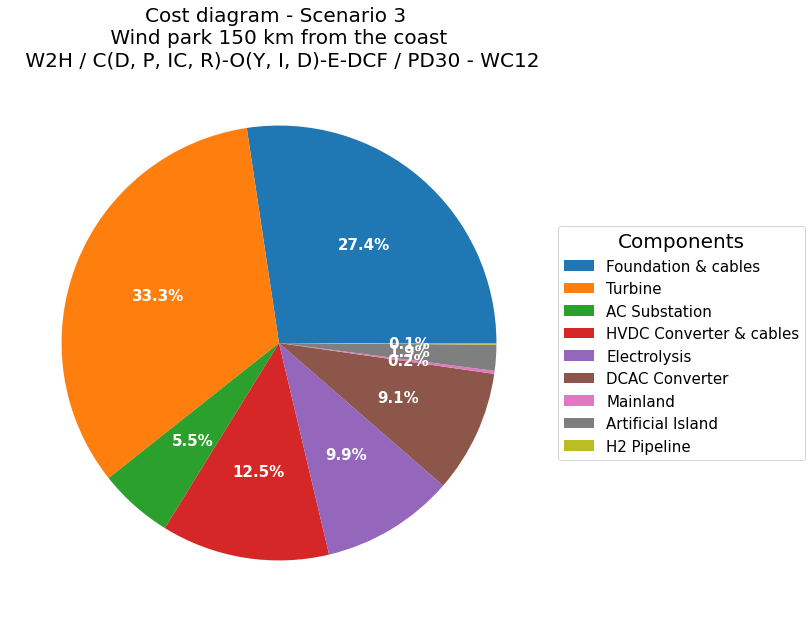

In [56]:
# create pie plot
fig, ax = plt.subplots(figsize=(16, 10), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Components",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
         fontsize=15)

plt.setp(autotexts, size=15, weight="bold")

ax.set_title("Cost diagram - Scenario 3 \n Wind park 150 km from the coast \n W2H / C(D, P, IC, R)-O(Y, I, D)-E-DCF / PD30 - WC12", fontsize=20)

plt.show()

##### 5. Energy production + LCOE & LCOH

In [57]:
wind_energy_production_per_year_park1 = (turbine_data['unit']) * 1000 * 4380
print('wind_energy_production_per_year_park1: {:.0f} kWh'.format(wind_energy_production_per_year_park1))
wind_energy_production_per_year_park2 = (turbine2_data['unit']) * 1000 * 4380
print('wind_energy_production_per_year_park2: {:.0f} kWh'.format(wind_energy_production_per_year_park2))

total_wind_energy_production_per_year = []
for year in range(startyear, endyear+1):
    if year < (startyear + turbine_data['construction_duration']):
        # Wind park 1 not yet operational
        total_wind_energy_production_per_year.append(0)
    else:
        # Both wind parks operational
        total_wind_energy_production_per_year.append(wind_energy_production_per_year_park1 + wind_energy_production_per_year_park2)

# Create a DataFrame to hold the data
production_data = {
    'Year': range(startyear, endyear+1),
    'Wind Energy Production (kWh)': total_wind_energy_production_per_year
}
df_wind = pd.DataFrame(production_data)

# Print the table
print(df_wind)

wind_energy_production_per_year_park1: 52560000000 kWh
wind_energy_production_per_year_park2: 0 kWh
    Year  Wind Energy Production (kWh)
0   2030                             0
1   2031                             0
2   2032                             0
3   2033                   52560000000
4   2034                   52560000000
5   2035                   52560000000
6   2036                   52560000000
7   2037                   52560000000
8   2038                   52560000000
9   2039                   52560000000
10  2040                   52560000000
11  2041                   52560000000
12  2042                   52560000000
13  2043                   52560000000
14  2044                   52560000000
15  2045                   52560000000
16  2046                   52560000000
17  2047                   52560000000
18  2048                   52560000000
19  2049                   52560000000
20  2050                   52560000000
21  2051                   52560000000
22 

In [58]:
# Multiply every annual value by the cable efficiency factors
wind_energy_production_per_year_after_cable_losses = []
for energy in total_wind_energy_production_per_year:
    energy_after_cable_losses = energy * inter_array_cable_efficiency * DC_collection_cable_efficiency * HVDC_cable_efficiency
    wind_energy_production_per_year_after_cable_losses.append(energy_after_cable_losses)

# Calculate energy after electrolysis and transportation onshore and convert to kg hydrogen
hydrogen_onshore_per_year = []
for energy in wind_energy_production_per_year_after_cable_losses:
    energy_after_electrolysis = energy * dedicated_electrolyser_energy / kWh_to_kg
    energy_after_pipeline = energy_after_electrolysis * H2_pipeline_efficiency
    hydrogen_onshore_per_year.append(energy_after_pipeline)

# Calculate energy after DCAC converter and transportation onshore
electricity_onshore_per_year = []
for energy in wind_energy_production_per_year_after_cable_losses:
    energy_after_DCAC = energy * dedicated_DCAC_energy * DCAC_efficiency
    electricity_onshore_per_year.append(energy_after_DCAC)
    
#Calculate electricity after hydrogen conversion
electricity_after_hydrogen_per_year = []
for energy in hydrogen_onshore_per_year:
    electricity_after_hydrogen = energy * 0.5
    electricity_after_hydrogen_per_year.append(electricity_after_hydrogen)

# Print summed values
total_hydrogen_onshore = sum(hydrogen_onshore_per_year)
total_electricity_onshore = sum(electricity_onshore_per_year)
total_hydrogen_converted_to_electricity_onshore = sum(electricity_after_hydrogen_per_year)
print("Total hydrogen onshore: {:.2f} kg hydrogen".format(total_hydrogen_onshore))
print("Total electricity onshore: {:.2f} kWh".format(total_electricity_onshore))
print("Total hydrogen converted to electricity onshore: {:.2f} kWh".format(total_hydrogen_converted_to_electricity_onshore))

Total hydrogen onshore: 6732805165.02 kg hydrogen
Total electricity onshore: 744152149818.00 kWh
Total hydrogen converted to electricity onshore: 3366402582.51 kWh


In [59]:
WACC = WACC

present_value_hydrogen = []
for i, production in enumerate(hydrogen_onshore_per_year):
    pv = production * (1 / ((1 + WACC) ** (startyear+i - escalation_base_year)))
    present_value_hydrogen.append(pv)
    
npv_hydrogen = sum(present_value_hydrogen)
print("Net Present Value hydrogen: {:.2f} kg".format(npv_hydrogen))

present_value_electricity = []
for i, production in enumerate(electricity_onshore_per_year):
    pv = production * (1 / ((1 + WACC) ** (startyear+i - escalation_base_year)))
    present_value_electricity.append(pv)
    
npv_electricity = sum(present_value_electricity)
print("Net Present Value electricity: {:.2f} kWh".format(npv_electricity))

present_value_electricity_after_hydrogen = []
for i, production in enumerate(electricity_after_hydrogen_per_year):
    pv = production * (1 / ((1 + WACC) ** (startyear+i - escalation_base_year)))
    present_value_electricity_after_hydrogen.append(pv)
    
npv_electricity_after_hydrogen = sum(present_value_electricity_after_hydrogen)
print("Net Present Value hydrogen converted to electricity onshore: {:.2f} kWh".format(npv_electricity_after_hydrogen))

Net Present Value hydrogen: 1933827275.34 kg
Net Present Value electricity: 213738804116.79 kWh
Net Present Value hydrogen converted to electricity onshore: 966913637.67 kWh


In [60]:
total_cost = final_npv_sum*-1            # EU

total_cost_hydrogen = data_hydrogen

total_cost_electricity = data_electricity

In [61]:
LCOH = total_cost_hydrogen / npv_hydrogen
LCOH2 = total_cost_hydrogen / npv_electricity_after_hydrogen
LCOE = total_cost_electricity / npv_electricity

npv_hydrogen_energy_produced = npv_hydrogen * 141.800 #MJ / kg
npv_electricity_energy_produced = npv_electricity * 3.600 #MJ / kWh

LCOTE = total_cost / (npv_hydrogen_energy_produced + npv_electricity_energy_produced)

print('LCOH: {:.2f} EU/kg'.format(LCOH))

print('LCOH2: {:.2f} EU/kWh'.format(LCOH2))

print('LCOE: {:.4f} EU/kWh'.format(LCOE))

print('Levelised Cost of Total Energy (LCOTE): {:.2f} EU/MJ'.format(LCOTE))

LCOH: 9.22 EU/kg
LCOH2: 18.43 EU/kWh
LCOE: 0.1612 EU/kWh
Levelised Cost of Total Energy (LCOTE): 0.05 EU/MJ


In [62]:
total_wind_energy_production = sum(total_wind_energy_production_per_year)

hydrogen_energy_produced = total_hydrogen_onshore * 141.8 #MJ / kg
electricity_energy_produced = total_electricity_onshore * 3.6 #MJ / kWh

electrical_energy_input = total_wind_energy_production * 3.6 #MJ / kWh

SupplyChain_efficiency = (hydrogen_energy_produced + electricity_energy_produced) / electrical_energy_input 

print('SupplyChain efficiency: {:.2f} %'.format(SupplyChain_efficiency*100))

SupplyChain efficiency: 71.13 %


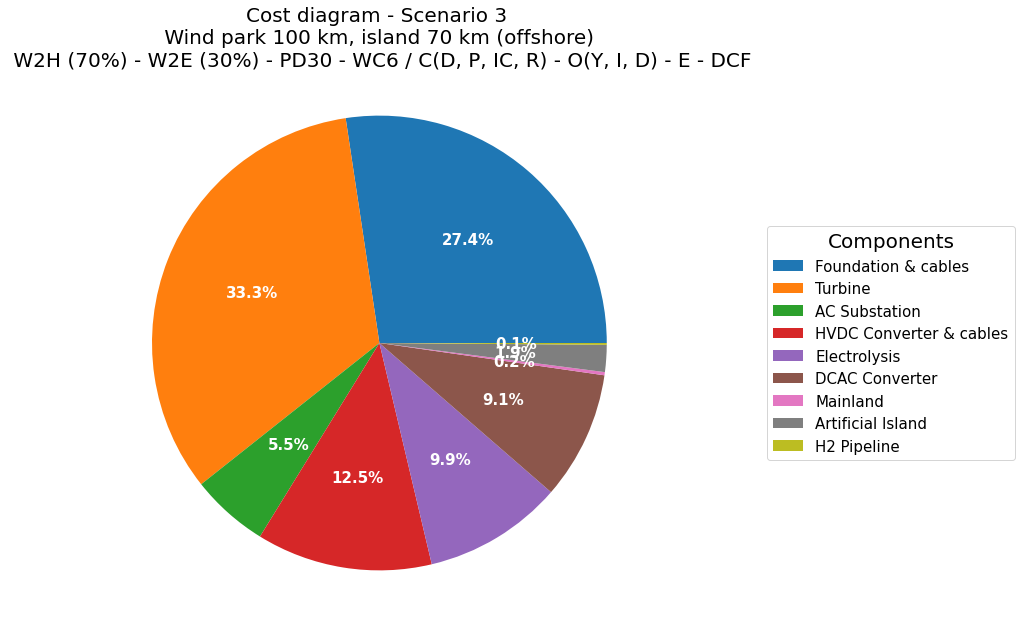

Total cost (NPV): 52.28 billion EUR
LCOH: 9.22 EUR / kg
LCOH2: 18.43 EUR / kWh
LCOE: 0.16 EUR / kWh
Levelised Cost of Total Energy (LCOTE): 0.05 EUR / MJ
Supply Chain efficiency: 71.13 %


In [63]:
fig, ax = plt.subplots(figsize=(16, 10), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    rounded_pct = round(pct, 2)
    if rounded_pct == 0:
        return ""
    return f"{rounded_pct:.1f}%"

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), radius=total_cost/50_000_000_000)

ax.legend(wedges, labels,
          title="Components",
          loc="center left",
          bbox_to_anchor=(1.2, 0.5),
          fontsize=15)

plt.setp(autotexts, size=15, weight="bold")

title = ax.set_title("Cost diagram - Scenario 3 \n Wind park 100 km, island 70 km (offshore) \n W2H (70%) - W2E (30%) - PD30 - WC6 / C(D, P, IC, R) - O(Y, I, D) - E - DCF", fontsize=20)

plt.show()

cost_in_billions = total_cost / 1_000_000_000
print(f"{BOLD}Total cost (NPV): {cost_in_billions:.2f} billion EUR")
print(f"LCOH: {LCOH:.2f} EUR / kg")
print(f"LCOH2: {LCOH2:.2f} EUR / kWh")
print(f"LCOE: {LCOE:.2f} EUR / kWh")
print('Levelised Cost of Total Energy (LCOTE): {:.2f} EUR / MJ'.format(LCOTE))
print('Supply Chain efficiency: {:.2f} %'.format(SupplyChain_efficiency*100))

##### 6 - Revenues

In [64]:
# make df_combined again (only cashflows no npv yet)
df_combined=combine_cashflow_dataframes([Foundation.df, Foundation2.df, Turbine.df, Turbine2.df, ACStation.df, DCCollectionCable.df, HVDCConverter.df, HVDCCable.df, HVDCCable2.df, Electrolyser.df, DesalinationUnit.df, CompressorUnit.df, StorageUnit.df, CompressorAfterStorage.df, DCACConverter.df, ArtificialIsland.df, H2Pipeline.df])

In [65]:
# create a set of escalation years and values
escalation_years = []
escalation_values = []
previous = 1
for index, year in enumerate(list(range(escalation_base_year, escalation_base_year + lifecycle + 1))):
    previous = previous * (1 + escalation_rate)
    escalation_years.append(year)    
    escalation_values.append(previous)

In [66]:
# create list of revenue years
revenue_years = list(range(startyear, endyear+1))

# calculate revenues for both electricity and hydrogen
electricity_revenue_value_per_year = [energy * electricity_price for energy in electricity_onshore_per_year]
hydrogen_revenue_value_per_year = [energy * hydrogen_price for energy in hydrogen_onshore_per_year]

# create a list of the combined electricity and hydrogen revenue values (summed)
revenue_values = []
for e, h in zip(electricity_revenue_value_per_year, hydrogen_revenue_value_per_year):
    revenue_values.append(e + h)

# escalate the combined electricity and hydrogen revenue values
for i, revenue_year in enumerate(revenue_years):
            revenue_values[i] = revenue_values[i] * escalation_values[
                [index for index, escalation_year in enumerate(escalation_years) if
                 escalation_year == revenue_year][0]]

In [67]:
# add the escalated combined electricity and hydrogen revenue values to df_combined
for i, revenue_year in enumerate(revenue_years):
    df_combined.loc[revenue_year, 'revenue'] = revenue_values[i]

In [68]:
# calculate the npv values
df_combined_npv = calculate_npv(df_combined, 2030, WACC=WACC)

In [69]:
import numpy_financial as npf

# Calculate the NPV of the cash flows
df_combined_npv = calculate_npv(df_combined, 2030, WACC=WACC)

# Extract the cash flows from the DataFrame and convert to a one-dimensional array
cash_flows = df_combined_npv['npv'].values

# Calculate the internal rate of return (IRR)
irr = npf.irr(cash_flows)

# Convert the IRR to a string with two decimal places
irr_str = "{:.2f}%".format(irr * 100)

# Print the IRR
print("Internal Rate of Return (IRR): {:.2%}".format(irr))

Internal Rate of Return (IRR): 2.74%


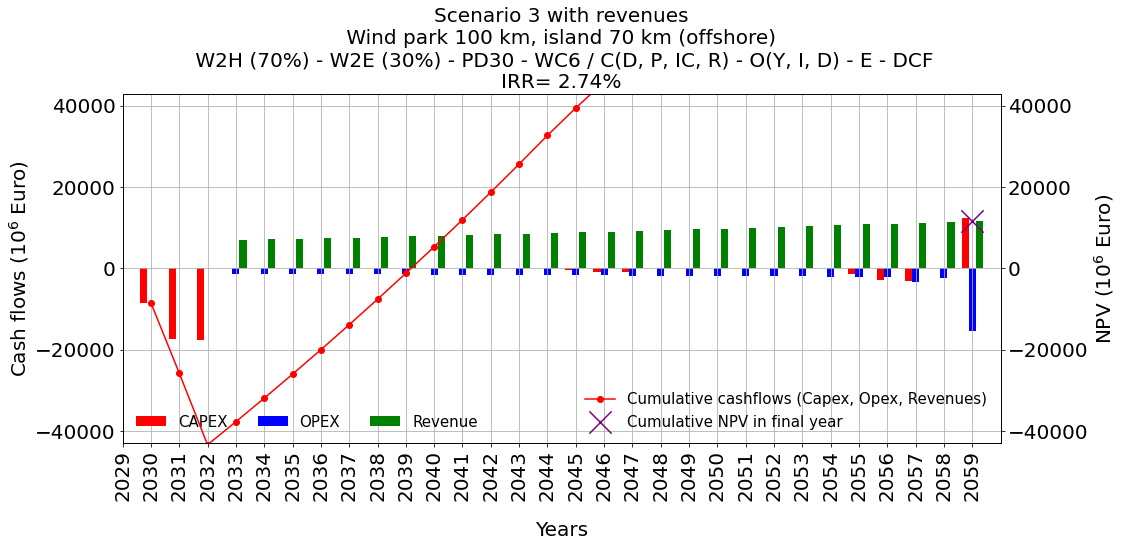

In [70]:
# plot
create_npv_plot(df_combined_npv, title='Scenario 3 with revenues\n Wind park 100 km, island 70 km (offshore) \n W2H (70%) - W2E (30%) - PD30 - WC6 / C(D, P, IC, R) - O(Y, I, D) - E - DCF\nIRR= ' + irr_str )

In [71]:
final_npv_sum_revenue = df_combined_npv['npv_sum'].iloc[-1]
print(final_npv_sum_revenue/1000000000)

11.701930676803709


##### 7 - Probabilistic calculations

In [72]:
import matplotlib.pyplot as plt
from scipy import stats 

In [142]:
#Optie 2

# Create a list of capex_per_unit's
Foundation_capex_per_unit = stats.norm(foundation_data['capex_per_unit'],foundation_data['capex_per_unit']*0.1)
Turbine_capex_per_unit = stats.norm(turbine_data['capex_per_unit'],turbine_data['capex_per_unit']*0.1)
ACStation_capex_per_unit = stats.norm(AC_substation_data['capex_per_unit'],AC_substation_data['capex_per_unit']*0.1)
DCCollectionCable_capex_per_unit = stats.norm(DC_collection_cable_data['capex_per_unit'],DC_collection_cable_data['capex_per_unit']*0.1)
HVDCConverter_capex_per_unit = stats.norm(HVDC_converter_data['capex_per_unit'],HVDC_converter_data['capex_per_unit']*0.1)
HVDCCable_capex_per_unit = stats.norm(HVDC_cable_data['capex_per_unit'],HVDC_cable_data['capex_per_unit']*0.1)
Electrolyser_capex_per_unit = stats.norm(Electrolyser_data['capex_per_unit'],Electrolyser_data['capex_per_unit']*0.3)
DesalinationUnit_capex_per_unit = stats.norm(Desalination_unit_data['capex_per_unit'],Desalination_unit_data['capex_per_unit']*0.3)
CompressorUnit_capex_per_unit = stats.norm(Compressor_unit_data['capex_per_unit'],Compressor_unit_data['capex_per_unit']*0.3)
StorageUnit_capex_per_unit = stats.norm(Storage_unit_data['capex_per_unit'],Storage_unit_data['capex_per_unit']*0.3)
ArtificialIsland_capex_per_unit = stats.norm(Artificial_island_data['capex_per_unit'],Artificial_island_data['capex_per_unit']*0.1)
CompressorAfterStorage_capex_per_unit = stats.norm(Compressor_after_storage_data['capex_per_unit'],Compressor_after_storage_data['capex_per_unit']*0.3)
DCACConverter_capex_per_unit = stats.norm(DCAC_converter_data['capex_per_unit'], DCAC_converter_data['capex_per_unit']*0.1)
Mainland_capex_per_unit = stats.norm(Mainland_data['capex_per_unit'], Mainland_data['capex_per_unit']*0.1)
H2Pipeline_capex_per_unit = stats.norm(H2_pipeline_data['capex_per_unit'], H2_pipeline_data['capex_per_unit']*0.1)

In [143]:
nr_of_realisations = 1000

Foundation_capex_per_unit_realisations = Foundation_capex_per_unit.rvs(nr_of_realisations)
Turbine_capex_per_unit_realisations = Turbine_capex_per_unit.rvs(nr_of_realisations)
ACStation_capex_per_unit_realisations = ACStation_capex_per_unit.rvs(nr_of_realisations)
DCCollectionCable_capex_per_unit_realisations = DCCollectionCable_capex_per_unit.rvs(nr_of_realisations)
HVDCConverter_capex_per_unit_realisations = HVDCConverter_capex_per_unit.rvs(nr_of_realisations)
HVDCCable_capex_per_unit_realisations = HVDCCable_capex_per_unit.rvs(nr_of_realisations)
Electrolyser_capex_per_unit_realisations = Electrolyser_capex_per_unit.rvs(nr_of_realisations)
DesalinationUnit_capex_per_unit_realisations = DesalinationUnit_capex_per_unit.rvs(nr_of_realisations)
CompressorUnit_capex_per_unit_realisations = CompressorUnit_capex_per_unit.rvs(nr_of_realisations)
StorageUnit_capex_per_unit_realisations = StorageUnit_capex_per_unit.rvs(nr_of_realisations)
CompressorAfterStorage_capex_per_unit_realisations = CompressorAfterStorage_capex_per_unit.rvs(nr_of_realisations)
ArtificialIsland_capex_per_unit_realisations = ArtificialIsland_capex_per_unit.rvs(nr_of_realisations)
DCACConverter_capex_per_unit_realisations = DCACConverter_capex_per_unit.rvs(nr_of_realisations)
Mainland_capex_per_unit_realisations = Mainland_capex_per_unit.rvs(nr_of_realisations)
H2Pipeline_capex_per_unit_realisations = H2Pipeline_capex_per_unit.rvs(nr_of_realisations)

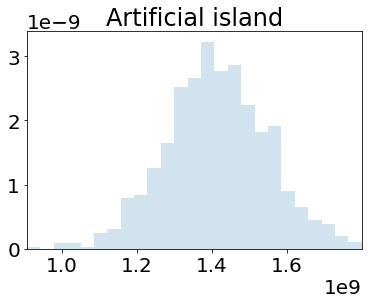

In [75]:
fig, ax = plt.subplots(1, 1)
plt.hist(ArtificialIsland_capex_per_unit_realisations, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([round(min(ArtificialIsland_capex_per_unit_realisations)), round(max(ArtificialIsland_capex_per_unit_realisations))])
ax.set_title(Artificial_island_data['component'])
plt.show()

In [76]:
LCOH_stat = []
startyear=2030
for index, value in enumerate(Foundation_capex_per_unit_realisations):
    Foundation = Object(**foundation_data)
    Foundation.capex_per_unit = Foundation_capex_per_unit_realisations[index]
    Turbine = Object(**turbine_data)
    Turbine.capex_per_unit = Turbine_capex_per_unit_realisations[index]
    ACStation = Object(**AC_substation_data)
    ACStation.capex_per_unit = ACStation_capex_per_unit_realisations[index]
    DCCollectionCable = Object(**DC_collection_cable_data)
    DCCollectionCable.capex_per_unit = DCCollectionCable_capex_per_unit_realisations[index]
    HVDCConverter = Object(**HVDC_converter_data)
    HVDCConverter.capex_per_unit = HVDCConverter_capex_per_unit_realisations[index]
    HVDCCable = Object(**HVDC_cable_data)
    HVDCCable.capex_per_unit = HVDCCable_capex_per_unit_realisations[index]
    Electrolyser = Object(**Electrolyser_data)
    Electrolyser.capex_per_unit = Electrolyser_capex_per_unit_realisations[index]
    DesalinationUnit = Object(**Desalination_unit_data)
    DesalinationUnit.capex_per_unit = DesalinationUnit_capex_per_unit_realisations[index]
    CompressorUnit = Object(**Compressor_unit_data)
    CompressorUnit.capex_per_unit = CompressorUnit_capex_per_unit_realisations[index]
    StorageUnit = Object(**Storage_unit_data)
    StorageUnit.capex_per_unit = StorageUnit_capex_per_unit_realisations[index]
    CompressorAfterStorage = Object(**Compressor_after_storage_data)
    CompressorAfterStorage.capex_per_unit = CompressorAfterStorage_capex_per_unit_realisations[index]
    ArtificialIsland = Object(**Artificial_island_data)
    ArtificialIsland.capex_per_unit = ArtificialIsland_capex_per_unit_realisations[index]
    DCACConverter = Object(**DCAC_converter_data)
    DCACConverter.capex_per_unit = DCACConverter_capex_per_unit_realisations[index]
    Mainland = Object(**Mainland_data)
    Mainland.capex_per_unit = Mainland_capex_per_unit_realisations[index]
    H2Pipeline = Object(**H2_pipeline_data)
    H2Pipeline.capex_per_unit = H2Pipeline_capex_per_unit_realisations[index]
    
    Foundation.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    Turbine.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    ACStation.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    DCCollectionCable.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    HVDCConverter.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    HVDCCable.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    Electrolyser.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    DesalinationUnit.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    CompressorUnit.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    ArtificialIsland.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    StorageUnit.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    CompressorAfterStorage.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    DCACConverter.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    Mainland.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    H2Pipeline.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    
    Foundation.df_npv = calculate_npv(Foundation.df, startyear, WACC=WACC)
    Turbine.df_npv = calculate_npv(Turbine.df, startyear, WACC=WACC)
    ACStation.df_npv = calculate_npv(ACStation.df, startyear, WACC=WACC)
    DCCollectionCable.df_npv = calculate_npv(DCCollectionCable.df, startyear, WACC=WACC)
    HVDCConverter.df_npv = calculate_npv(HVDCConverter.df, startyear, WACC=WACC)
    HVDCCable.df_npv = calculate_npv(HVDCCable.df, startyear, WACC=WACC)
    Electrolyser.df_npv = calculate_npv(Electrolyser.df, startyear, WACC=WACC)
    DesalinationUnit.df_npv = calculate_npv(DesalinationUnit.df, startyear, WACC=WACC)
    CompressorUnit.df_npv = calculate_npv(CompressorUnit.df, startyear, WACC=WACC)
    ArtificialIsland.df_npv = calculate_npv(ArtificialIsland.df, startyear, WACC=WACC)
    StorageUnit.df_npv = calculate_npv(StorageUnit.df, startyear, WACC=WACC)
    CompressorAfterStorage.df_npv = calculate_npv(CompressorAfterStorage.df, startyear, WACC=WACC)
    DCACConverter.df_npv = calculate_npv(DCACConverter.df, startyear, WACC=WACC)
    Mainland.df_npv = calculate_npv(Mainland.df, startyear, WACC=WACC)
    H2Pipeline.df_npv = calculate_npv(H2Pipeline.df, startyear, WACC=WACC)
    
    # combine the values of certain items
    foundation_cables_value_npv_sum = -Foundation.df_npv.npv_sum.iloc[-1]
    turbine_value_npv_sum = -Turbine.df_npv.npv_sum.iloc[-1]
    AC_substation_value_npv_sum = -ACStation.df_npv.npv_sum.iloc[-1] - DCCollectionCable.df_npv.npv_sum.iloc[-1]
    hvdc_converter_value_npv_sum = -HVDCConverter.df_npv.npv_sum.iloc[-1] 
    hvdc_cable_value_npv_sum = - HVDCCable.df_npv.npv_sum.iloc[-1] 
    electrolysis_value_npv_sum = -Electrolyser.df_npv.npv_sum.iloc[-1] -DesalinationUnit.df_npv.npv_sum.iloc[-1] -CompressorUnit.df_npv.npv_sum.iloc[-1] -StorageUnit.df_npv.npv_sum.iloc[-1] -CompressorAfterStorage.df_npv.npv_sum.iloc[-1]
    dcac_converter_value_npv_sum = -DCACConverter.df_npv.npv_sum.iloc[-1]
    artificial_island_value_npv_sum = -ArtificialIsland.df_npv.npv_sum.iloc[-1]
    mainland_value_npv_sum = -Mainland.df_npv.npv_sum.iloc[-1]
    H2_pipeline_value_npv_sum = -H2Pipeline.df_npv.npv_sum.iloc[-1]

    # create a new data point for each combined value
    data_hydrogen_npv_stat = [foundation_cables_value_npv_sum, turbine_value_npv_sum, AC_substation_value_npv_sum, hvdc_converter_value_npv_sum, electrolysis_value_npv_sum, artificial_island_value_npv_sum, H2_pipeline_value_npv_sum
    ]

    #Cost allocation to hydrogen
    dedicated_data_hydrogen_npv_stat = []
    for item in data_hydrogen_npv_stat:
        if item not in [electrolysis_value_npv_sum, H2_pipeline_value_npv_sum]:
            dedicated_data_hydrogen_npv_stat.append(dedicated_electrolyser_energy * item)

    data_hydrogen_stat = sum(dedicated_data_hydrogen_npv_stat) + electrolysis_value_npv_sum + H2_pipeline_value_npv_sum
    
    total_cost_stat = data_hydrogen_stat 
    LCOH_stat.append(total_cost_stat / npv_hydrogen)


In [144]:
total_cost_stat = []
startyear=2030
for index, value in enumerate(Foundation_capex_per_unit_realisations):
    Foundation = Object(**foundation_data)
    Foundation.capex_per_unit = Foundation_capex_per_unit_realisations[index]
    Turbine = Object(**turbine_data)
    Turbine.capex_per_unit = Turbine_capex_per_unit_realisations[index]
    ACStation = Object(**AC_substation_data)
    ACStation.capex_per_unit = ACStation_capex_per_unit_realisations[index]
    DCCollectionCable = Object(**DC_collection_cable_data)
    DCCollectionCable.capex_per_unit = DCCollectionCable_capex_per_unit_realisations[index]
    HVDCConverter = Object(**HVDC_converter_data)
    HVDCConverter.capex_per_unit = HVDCConverter_capex_per_unit_realisations[index]
    HVDCCable = Object(**HVDC_cable_data)
    HVDCCable.capex_per_unit = HVDCCable_capex_per_unit_realisations[index]
    Electrolyser = Object(**Electrolyser_data)
    Electrolyser.capex_per_unit = Electrolyser_capex_per_unit_realisations[index]
    DesalinationUnit = Object(**Desalination_unit_data)
    DesalinationUnit.capex_per_unit = DesalinationUnit_capex_per_unit_realisations[index]
    CompressorUnit = Object(**Compressor_unit_data)
    CompressorUnit.capex_per_unit = CompressorUnit_capex_per_unit_realisations[index]
    StorageUnit = Object(**Storage_unit_data)
    StorageUnit.capex_per_unit = StorageUnit_capex_per_unit_realisations[index]
    CompressorAfterStorage = Object(**Compressor_after_storage_data)
    CompressorAfterStorage.capex_per_unit = CompressorAfterStorage_capex_per_unit_realisations[index]
    ArtificialIsland = Object(**Artificial_island_data)
    ArtificialIsland.capex_per_unit = ArtificialIsland_capex_per_unit_realisations[index]
    DCACConverter = Object(**DCAC_converter_data)
    DCACConverter.capex_per_unit = DCACConverter_capex_per_unit_realisations[index]
    Mainland = Object(**Mainland_data)
    Mainland.capex_per_unit = Mainland_capex_per_unit_realisations[index]
    H2Pipeline = Object(**H2_pipeline_data)
    H2Pipeline.capex_per_unit = H2Pipeline_capex_per_unit_realisations[index]
    
    Foundation.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    Turbine.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    ACStation.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    DCCollectionCable.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    HVDCConverter.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    HVDCCable.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    Electrolyser.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    DesalinationUnit.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    CompressorUnit.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    ArtificialIsland.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    StorageUnit.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    CompressorAfterStorage.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    DCACConverter.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    Mainland.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    H2Pipeline.generate_cashflows(startyear=startyear, lifecycle=lifecycle, debug=False)
    
    Foundation.df_npv = calculate_npv(Foundation.df, startyear, WACC=WACC)
    Turbine.df_npv = calculate_npv(Turbine.df, startyear, WACC=WACC)
    ACStation.df_npv = calculate_npv(ACStation.df, startyear, WACC=WACC)
    DCCollectionCable.df_npv = calculate_npv(DCCollectionCable.df, startyear, WACC=WACC)
    HVDCConverter.df_npv = calculate_npv(HVDCConverter.df, startyear, WACC=WACC)
    HVDCCable.df_npv = calculate_npv(HVDCCable.df, startyear, WACC=WACC)
    Electrolyser.df_npv = calculate_npv(Electrolyser.df, startyear, WACC=WACC)
    DesalinationUnit.df_npv = calculate_npv(DesalinationUnit.df, startyear, WACC=WACC)
    CompressorUnit.df_npv = calculate_npv(CompressorUnit.df, startyear, WACC=WACC)
    ArtificialIsland.df_npv = calculate_npv(ArtificialIsland.df, startyear, WACC=WACC)
    StorageUnit.df_npv = calculate_npv(StorageUnit.df, startyear, WACC=WACC)
    CompressorAfterStorage.df_npv = calculate_npv(CompressorAfterStorage.df, startyear, WACC=WACC)
    DCACConverter.df_npv = calculate_npv(DCACConverter.df, startyear, WACC=WACC)
    Mainland.df_npv = calculate_npv(Mainland.df, startyear, WACC=WACC)
    H2Pipeline.df_npv = calculate_npv(H2Pipeline.df, startyear, WACC=WACC)
    
    cost_data = [
        -Foundation.df_npv.npv_sum.iloc[-1],
        -Turbine.df_npv.npv_sum.iloc[-1],
        -ACStation.df_npv.npv_sum.iloc[-1],
        - DCCollectionCable.df_npv.npv_sum.iloc[-1],
        -HVDCConverter.df_npv.npv_sum.iloc[-1], 
        - HVDCCable.df_npv.npv_sum.iloc[-1], 
        -Electrolyser.df_npv.npv_sum.iloc[-1],
        -DesalinationUnit.df_npv.npv_sum.iloc[-1],
        -CompressorUnit.df_npv.npv_sum.iloc[-1],
        -StorageUnit.df_npv.npv_sum.iloc[-1],
        -CompressorAfterStorage.df_npv.npv_sum.iloc[-1],
        -DCACConverter.df_npv.npv_sum.iloc[-1],
        -ArtificialIsland.df_npv.npv_sum.iloc[-1],
        -Mainland.df_npv.npv_sum.iloc[-1],
        -H2Pipeline.df_npv.npv_sum.iloc[-1],
    ]
    total_cost = sum(cost_data)
    
    total_cost_stat.append(total_cost/1)

In [145]:
total_cost_stat

[55138137521.109215,
 47007924222.03428,
 54283000137.12729,
 48399406914.12432,
 53173805608.47331,
 49699204147.87327,
 48684223655.80013,
 52321029501.00762,
 50365874042.617805,
 51952816838.73673,
 54528706604.06841,
 51633441427.121735,
 51907383124.47839,
 56115861575.72686,
 53612873975.511734,
 50915769335.8944,
 52943723026.71336,
 53951043408.22797,
 48367247583.01823,
 51981166582.2723,
 50383787896.48686,
 51115622399.884705,
 53404797324.20032,
 53598591244.908905,
 54149352543.25134,
 50562995485.6265,
 51944356359.80593,
 53504266176.25492,
 50603048437.13967,
 49298528913.81459,
 49769166410.590034,
 50927027641.559105,
 54026533197.38347,
 49744282776.941956,
 58018188262.03397,
 54725672553.85173,
 51660837519.88159,
 49808362057.4226,
 52861269110.15892,
 49008262596.43174,
 48400717277.46998,
 49392044811.210594,
 54144365217.477036,
 54117212559.3069,
 49216283952.51007,
 50942773810.40361,
 50652967501.8621,
 52452614723.944695,
 56702537247.95861,
 52079022322.3

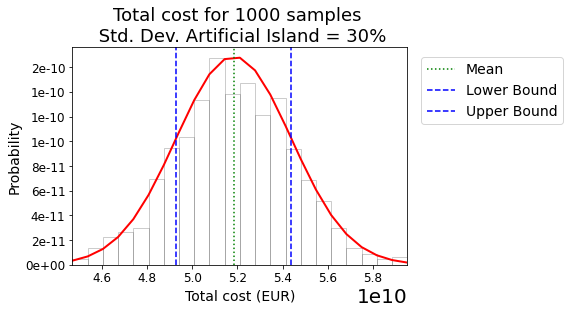

In [146]:
import matplotlib.ticker as mtick
from scipy.stats import norm

mean_total_cost = np.mean(total_cost_stat)
median_total_cost = np.median(total_cost_stat)
std_total_cost = np.std(total_cost_stat)
lower_bound = mean_total_cost - std_total_cost
upper_bound = mean_total_cost + std_total_cost

fig, ax = plt.subplots(1, 1)

# Plot histogram
n, bins, patches = plt.hist(total_cost_stat, density=True, bins='auto', histtype='bar', color= 'white', edgecolor='black', alpha=0.2)

# Get probability density function (PDF)
y = norm.pdf(bins, mean_total_cost, std_total_cost)

# Scale PDF to match histogram
y = y * np.max(n) / np.max(y)

# Plot PDF with smooth line
plt.plot(bins, y, 'r-', linewidth=2)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Set y-axis tick formatter in scientific notation with 0 decimal places
fmt = mtick.FormatStrFormatter('%.0e')
ax.yaxis.set_major_formatter(fmt)

# Set x-axis and y-axis limits
ax.set_xlim([bins[0], bins[-1]])

# Label axes and title
ax.set_xlabel('Total cost (EUR)', fontsize = 14)
ax.set_ylabel('Probability', fontsize = 14)
ax.set_title('Total cost for 1000 samples \n Std. Dev. Artificial Island = 30%', fontsize = 18)

# Add vertical lines for mean and median
ax.axvline(x=mean_total_cost, color='g', linestyle='dotted', label='Mean')

percent_within_1std = (norm.cdf(upper_bound, mean_total_cost, std_total_cost) - norm.cdf(lower_bound, mean_total_cost, std_total_cost)) * 100
plt.axvline(x=lower_bound, color='b', linestyle='--', label='Lower Bound')
plt.axvline(x=upper_bound, color='b', linestyle='--', label='Upper Bound')

ax.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02), borderaxespad=1, fontsize = 14)

plt.show()


In [147]:
mean_total_cost_billion = mean_total_cost / 1000000000
std_total_cost_billion = std_total_cost / 1000000000

print("Original total cost: {:.2f} EUR".format(total_cost))
print("Mean total cost: {:.2f} billion EUR".format(mean_total_cost_billion))
print("Standard deviation of total_cost: {:.2f} billion EUR".format(std_total_cost_billion))
print("Chance the total cost will fall within the mean plus or minus the std. dev.: {:.2f}%".format(percent_within_1std))

# Find bin with highest probability and use bin center value as total cost value or value range with highest probability
max_bin_idx = np.argmax(y)
max_bin_center = (bins[max_bin_idx] + bins[max_bin_idx+1]) / 2
if max_bin_idx == 0:
    max_bin_width = bins[1] - bins[0]
elif max_bin_idx == len(bins) - 2:
    max_bin_width = bins[-1] - bins[-2]
else:
    max_bin_width = (bins[max_bin_idx+1] - bins[max_bin_idx-1]) / 2

if max_bin_width > 0:
    max_bin_area = norm.cdf(bins[max_bin_idx+1], mean_total_cost, std_total_cost) - norm.cdf(bins[max_bin_idx], mean_total_cost, std_total_cost)
    max_bin_prob = max_bin_area * max_bin_width
    print("total_cost value or value range with highest probability: {:.2f} - {:.2f} EUR/kg".format(max_bin_center-max_bin_width/2, max_bin_center+max_bin_width/2))
    print("Probability of total_cost value or value range with highest probability: {:.2f}%".format(max_bin_prob))
else:
    max_bin_prob = y[max_bin_idx]
    print("total_cost value with highest probability: {:.2f} EUR".format(max_bin_center))
    print("Probability of total_cost value with highest probability: {:.2f}%".format(max_bin_prob))


Original total cost: 52679022749.25 EUR
Mean total cost: 51.84 billion EUR
Standard deviation of total_cost: 2.55 billion EUR
Chance the total cost will fall within the mean plus or minus the std. dev.: 68.27%
total_cost value or value range with highest probability: 52107706751.19 - 52781819197.68 EUR/kg
Probability of total_cost value or value range with highest probability: 68865158.34%


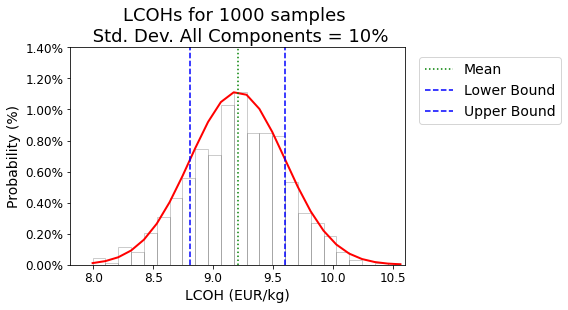

In [79]:
import matplotlib.ticker as mtick
from scipy.stats import norm

mean_LCOH = np.mean(LCOH_stat)
median_LCOH = np.median(LCOH_stat)
std_LCOH = np.std(LCOH_stat)
lower_bound = mean_LCOH - std_LCOH
upper_bound = mean_LCOH + std_LCOH

fig, ax = plt.subplots(1, 1)

# Plot histogram
n, bins, patches = plt.hist(LCOH_stat, density=True, bins='auto', histtype='bar', alpha=0.2, color= 'white', edgecolor='black')

# Get probability density function (PDF)
y = norm.pdf(bins, mean_LCOH, std_LCOH)

# Scale PDF to match histogram
y = y * np.max(n) / np.max(y)

# Plot PDF with smooth line
plt.plot(bins, y, 'r-', linewidth=2)

# Convert y-axis values to percentages
y = n * 100 / len(LCOH_stat)

# Format y-axis as percentages
fmt = '%.2f%%' 
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Set x-axis and y-axis limits
ax.set_xlim([(lower_bound-1), (upper_bound+1)])
ax.set_ylim([0, 1.4])

# Label axes and title
ax.set_xlabel('LCOH (EUR/kg)', fontsize = 14)
ax.set_ylabel('Probability (%)', fontsize = 14)
ax.set_title('LCOHs for 1000 samples \n Std. Dev. All Components = 10%', fontsize = 18)

# Add vertical lines for mean and median
ax.axvline(x=mean_LCOH, color='g', linestyle='dotted', label='Mean')

percent_within_1std = (norm.cdf(upper_bound, mean_LCOH, std_LCOH) - norm.cdf(lower_bound, mean_LCOH, std_LCOH)) * 100
plt.axvline(x=lower_bound, color='b', linestyle='--', label='Lower Bound')
plt.axvline(x=upper_bound, color='b', linestyle='--', label='Upper Bound')

ax.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02), borderaxespad=1, fontsize = 14)

plt.show()

# Get probability density function (PDF)
y = norm.pdf(bins, mean_LCOH, std_LCOH)



In [ ]:
print("Original LCOH: {:.2f} EUR/kg".format(LCOH))
print("Mean LCOH: {:.2f} EUR/kg".format(mean_LCOH))
print("Standard deviation of LCOH: {:.2f} EUR/kg".format(std_LCOH))
print("Chance the LCOH will fall within the mean plus or minus the std. dev.: {:.2f}%".format(percent_within_1std))

# Find bin with highest probability and use bin center value as LCOH value or value range with highest probability
max_bin_idx = np.argmax(y)
max_bin_center = (bins[max_bin_idx] + bins[max_bin_idx+1]) / 2
if max_bin_idx == 0:
    max_bin_width = bins[1] - bins[0]
elif max_bin_idx == len(bins) - 2:
    max_bin_width = bins[-1] - bins[-2]
else:
    max_bin_width = (bins[max_bin_idx+1] - bins[max_bin_idx-1]) / 2

if max_bin_width > 0:
    max_bin_area = norm.cdf(bins[max_bin_idx+1], mean_LCOH, std_LCOH) - norm.cdf(bins[max_bin_idx], mean_LCOH, std_LCOH)
    max_bin_prob = max_bin_area * max_bin_width
    print("LCOH value or value range with highest probability: {:.2f} - {:.2f} EUR/kg".format(max_bin_center-max_bin_width/2, max_bin_center+max_bin_width/2))
    print("Probability of LCOH value or value range with highest probability: {:.2f}%".format(max_bin_prob * 100))
else:
    max_bin_prob = y[max_bin_idx]
    print("LCOH value with highest probability: {:.2f} EUR/kg".format(max_bin_center))
    print("Probability of LCOH value with highest probability: {:.2f}%".format(max_bin_prob * 100))


In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of LCOH vs. Foundation capex per unit
plt.scatter(Foundation_capex_per_unit_realisations, LCOH_stat)
plt.xlabel('Foundation capex per unit (EUR/m)')
plt.ylabel('LCOH (EUR/kg)')
plt.title('LCOH vs. Foundation capex per unit')
plt.show()
